In [52]:
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set()

In [53]:
data_df = pd.read_csv('../data/all_tips_data.csv')
print data_df.shape
data_df.head()

(617, 51)


,pin,d.o.b.,medicaid,hospitalized,rpm_hospitalized,rpm_falls,rehospitalized,rpm_rehospitalized,chf,copd,diabetes,hypertension,stroke,hypoglycemia,falls,liver_disease,hypotension,obesity,coronary_artery_disease,fractures,renal,alzheimers,depression,status_active,gender_f,gender_m,lang_english,lang_other,lang_spanish,caregiver,live_alone,enduserid,missed_wks,total_wks,first_measure_date,compliance,systolic,diastolic,heartrate,weight,spo2,heartrate_spo2,age,number_visits,duration_in_program,feeling_trigger,hosp_er_trigger,dosage_trigger,med_trigger,fall_trigger,all_message_triggers
0,10001,1940-12-22,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,183,12,53,2015-07-13,0.773585,147.0,68.0,55.0,269.2,97.0,57.0,27231 days 00:00:00.000000000,38,371 days 00:00:00.000000000,3,1,3,6,1,14
1,10002,1933-04-24,0.0,0.0,NaN,1.0,0.0,NaN,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,185,24,50,2015-08-10,0.520000,135.0,74.0,69.0,195.8,96.0,62.0,30058 days 00:00:00.000000000,21,353 days 00:00:00.000000000,1,0,0,4,2,7
2,10004,1948-12-15,0.0,NaN,NaN,NaN,NaN,NaN,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,NaN,NaN,188,1,2,2015-12-21,0.500000,110.0,75.0,72.0,252.0,97.0,71.0,24477 days 00:00:00.000000000,8,172 days 00:00:00.000000000,1,0,1,3,0,5
3,10006,1948-11-28,0.0,0.0,NaN,NaN,0.0,NaN,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,193,24,51,2015-07-20,0.529412,122.0,78.0,61.0,250.7,97.0,60.0,24340 days 00:00:00.000000000,18,357 days 00:00:00.000000000,0,0,0,2,0,2
4,10009,1927-10-06,0.0,0.0,NaN,NaN,0.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,196,9,53,2015-07-13,0.830189,144.0,86.0,72.0,152.1,93.0,71.0,32057 days 00:00:00.000000000,49,371 days 00:00:00.000000000,1,0,0,2,0,3


In [54]:
print data_df.columns

Index([u'pin', u'd.o.b.', u'medicaid', u'hospitalized', u'rpm_hospitalized',
       u'rpm_falls', u'rehospitalized', u'rpm_rehospitalized', u'chf', u'copd',
       u'diabetes', u'hypertension', u'stroke', u'hypoglycemia', u'falls',
       u'liver_disease', u'hypotension', u'obesity',
       u'coronary_artery_disease', u'fractures', u'renal', u'alzheimers',
       u'depression', u'status_active', u'gender_f', u'gender_m',
       u'lang_english', u'lang_other', u'lang_spanish', u'caregiver',
       u'live_alone', u'enduserid', u'missed_wks', u'total_wks',
       u'first_measure_date', u'compliance', u'systolic', u'diastolic',
       u'heartrate', u'weight', u'spo2', u'heartrate_spo2', u'age',
       u'number_visits', u'duration_in_program', u'feeling_trigger',
       u'hosp_er_trigger', u'dosage_trigger', u'med_trigger', u'fall_trigger',
       u'all_message_triggers'],
      dtype='object')


In [55]:
chronic_conds = [u'chf', u'copd',
       u'diabetes', u'hypertension', u'stroke', u'hypoglycemia', u'falls',
       u'liver_disease', u'hypotension', u'obesity',
       u'coronary_artery_disease', u'fractures', u'renal', u'alzheimers',
       u'depression']
data_df['n_conds']=data_df[chronic_conds].apply(lambda x: x.sum(),axis=1)

In [56]:
data_df['n_conds'].value_counts()

0     238
1     182
2     112
3      58
4      20
5       3
6       2
10      1
7       1
Name: n_conds, dtype: int64

In [57]:
data_df[data_df['n_conds']==0]

,pin,d.o.b.,medicaid,hospitalized,rpm_hospitalized,rpm_falls,rehospitalized,rpm_rehospitalized,chf,copd,diabetes,hypertension,stroke,hypoglycemia,falls,liver_disease,hypotension,obesity,coronary_artery_disease,fractures,renal,alzheimers,depression,status_active,gender_f,gender_m,lang_english,lang_other,lang_spanish,caregiver,live_alone,enduserid,missed_wks,total_wks,first_measure_date,compliance,systolic,diastolic,heartrate,weight,spo2,heartrate_spo2,age,number_visits,duration_in_program,feeling_trigger,hosp_er_trigger,dosage_trigger,med_trigger,fall_trigger,all_message_triggers,n_conds
13,10029,1932-03-21,1.0,0.0,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,1.0,0.0,0.0,NaN,NaN,218,4,20,2016-03-10,0.800000,111.0,54.0,61.0,153.9,98.0,86.0,30670 days 00:00:00.000000000,19,140 days 00:00:00.000000000,0,0,0,0,0,0,0
17,10044,1938-04-20,0.0,0.0,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,216,21,55,2015-07-09,0.618182,106.0,65.0,70.0,131.0,96.0,64.0,28204 days 00:00:00.000000000,33,385 days 00:00:00.000000000,1,0,1,0,0,2,0
21,10051,1933-11-26,NaN,NaN,1.0,NaN,NaN,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,NaN,NaN,191,0,0,2015-10-08,NaN,142.0,87.0,72.0,151.0,98.0,113.0,29901 days 00:00:00.000000000,5,350 days 00:00:00.000000000,0,1,0,0,0,1,0
23,10061,1931-08-04,0.0,0.0,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,806,10,27,2015-10-26,0.629630,130.0,69.0,75.0,185.2,94.0,74.0,30764 days 00:00:00.000000000,18,213 days 00:00:00.000000000,0,0,0,0,0,0,0
24,10062,1957-01-22,0.0,0.0,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,807,0,0,2016-01-04,NaN,155.0,93.0,87.0,189.0,99.0,83.0,21531 days 00:00:00.000000000,1,0 days 00:00:00.000000000,0,0,0,0,0,0,0
27,10065,1940-11-20,0.0,0.0,1.0,NaN,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,810,10,16,2016-03-03,0.375000,117.0,76.0,75.0,153.0,96.0,74.0,27497 days 00:00:00.000000000,3,112 days 00:00:00.000000000,0,1,0,0,0,1,0
28,10066,1933-07-08,1.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,812,4,20,2016-03-10,0.800000,129.0,74.0,66.0,135.1,96.0,68.0,30196 days 00:00:00.000000000,19,140 days 00:00:00.000000000,0,0,0,0,0,0,0
29,10069,1957-02-05,0.0,0.0,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,882,9,15,2016-04-04,0.400000,157.0,89.0,60.0,126.8,98.0,62.0,21608 days 00:00:00.000000000,7,112 days 00:00:00.000000000,0,0,0,0,0,0,0
30,10070,1932-03-29,0.0,0.0,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,883,9,16,2016-03-28,0.437500,152.0,72.0,77.0,172.8,95.0,72.0,30680 days 00:00:00.000000000,7,112 days 00:00:00.000000000,0,0,0,0,0,0,0
31,10071,1930-03-28,0.0,0.0,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,885,0,0,2016-04-04,NaN,142.0,81.0,61.0,187.0,98.0,60.0,31419 days 00:00:00.000000000,2,28 days 00:00:00.000000000,0,0,0,0,0,0,0


In [58]:
print data_df.shape
print 'Drop all NA', data_df.dropna().shape
print data_df.count()

(617, 52)
Drop all NA (24, 52)
pin                        617
d.o.b.                     515
medicaid                   456
hospitalized               514
rpm_hospitalized            97
rpm_falls                   56
rehospitalized             512
rpm_rehospitalized          95
chf                        617
copd                       617
diabetes                   617
hypertension               617
stroke                     617
hypoglycemia               617
falls                      617
liver_disease              617
hypotension                617
obesity                    617
coronary_artery_disease    617
fractures                  617
renal                      617
alzheimers                 617
depression                 617
status_active              617
gender_f                   617
gender_m                   617
lang_english               617
lang_other                 617
lang_spanish               617
caregiver                  509
live_alone                 509
enduseri

In [59]:
data_df['rpm_hospitalized'].value_counts(dropna=False)

NaN     520
 1.0     95
 0.0      2
Name: rpm_hospitalized, dtype: int64

In [60]:
data_df['rpm_rehospitalized'].value_counts(dropna=False)

NaN     522
 0.0     75
 1.0     20
Name: rpm_rehospitalized, dtype: int64

### Recode NANs from rpm columns to 0 (No)

In [61]:
for col in [u'rpm_hospitalized',u'rpm_falls']:
    data_df[col]=data_df[col].replace([0,1,np.nan],[0,1,0])
print data_df['rpm_hospitalized'].value_counts(dropna=False)
print data_df['rpm_rehospitalized'].value_counts(dropna=False)
print data_df['alzheimers'].value_counts(dropna=False)
print data_df['hypotension'].value_counts(dropna=False)
print data_df['renal'].value_counts(dropna=False)
print data_df['fractures'].value_counts(dropna=False)
print data_df['falls'].value_counts(dropna=False)

0.0    522
1.0     95
Name: rpm_hospitalized, dtype: int64
NaN     522
 0.0     75
 1.0     20
Name: rpm_rehospitalized, dtype: int64
0    611
1      6
Name: alzheimers, dtype: int64
0    614
1      3
Name: hypotension, dtype: int64
0    608
1      9
Name: renal, dtype: int64
0    609
1      8
Name: fractures, dtype: int64
0    601
1     16
Name: falls, dtype: int64


In [62]:
data_df.to_csv('../data/all_tips_data.csv',index=False)

In [64]:
new_data = data_df.drop(['pin', 'd.o.b.', 'rpm_rehospitalized', 'rpm_falls', 'gender_m', 'alzheimers','hypotension','lang_other',
                         'missed_wks', 'total_wks', 'first_measure_date', 'status_active','lang_english','heartrate_spo2',
                        'hypoglycemia','fractures','renal','liver_disease', u'feeling_trigger',
       u'hosp_er_trigger', u'dosage_trigger', u'med_trigger', u'fall_trigger','enduserid'], axis = 1)
new_data.dropna(inplace=True)
new_data.reset_index(drop=True,inplace=True)
print new_data.shape
new_data.dtypes

(388, 28)


medicaid                   float64
hospitalized               float64
rpm_hospitalized           float64
rehospitalized             float64
chf                          int64
copd                         int64
diabetes                     int64
hypertension                 int64
stroke                       int64
falls                        int64
obesity                      int64
coronary_artery_disease      int64
depression                   int64
gender_f                   float64
lang_spanish               float64
caregiver                  float64
live_alone                 float64
compliance                 float64
systolic                   float64
diastolic                  float64
heartrate                  float64
weight                     float64
spo2                       float64
age                         object
number_visits                int64
duration_in_program         object
all_message_triggers         int64
n_conds                      int64
dtype: object

In [65]:
new_data['age']=new_data['age'].apply(lambda x: pd.tslib.Timedelta(x).days)
new_data['duration_in_program']=new_data['duration_in_program'].apply(lambda x: pd.tslib.Timedelta(x).days)

In [66]:
new_data.to_csv('../data/all_tips_data_new.csv',index=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014C1BEB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000012B127B8>]], dtype=object)

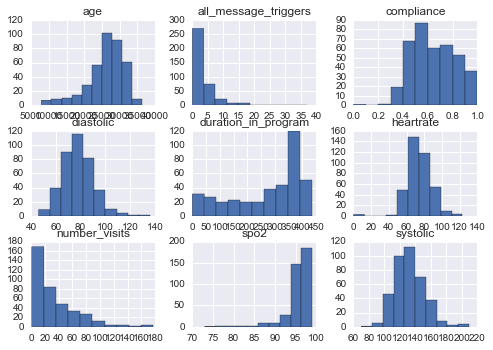

In [38]:
#continuous_feats = ['age','heartrate_spo2','spo2','heartrate','diastolic','systolic']
continuous_feats = ['age','compliance','spo2','heartrate','diastolic','systolic','number_visits',
                    'duration_in_program','all_message_triggers']
new_data[continuous_feats].hist()

In [39]:
new_data[continuous_feats].describe()

,age,compliance,spo2,heartrate,diastolic,systolic,number_visits,duration_in_program,all_message_triggers
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,26128.041237,0.643278,95.659794,73.992268,77.448454,131.917526,34.115979,273.605670,3.128866
std,5218.618294,0.182745,3.216195,14.257414,12.483992,19.630525,31.970181,128.702616,4.745066
min,7890.000000,0.000000,73.000000,0.000000,46.000000,70.000000,1.000000,0.000000,0.000000
25%,23955.250000,0.500000,95.000000,66.000000,69.000000,119.000000,9.000000,171.250000,0.000000
50%,27084.000000,0.622796,96.000000,73.000000,77.000000,130.000000,24.000000,329.000000,1.000000
75%,29795.750000,0.791667,97.000000,82.250000,85.000000,143.250000,50.000000,374.000000,4.000000
max,36391.000000,1.000000,99.000000,123.000000,136.000000,209.000000,177.000000,435.000000,37.000000


In [40]:
# For each feature find the data points with extreme high or low values
for feature in continuous_feats:
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(new_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(new_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    print (new_data[~((new_data[feature] >= Q1 - step) & (new_data[feature] <= Q3 + step))]).index
    display(new_data[~((new_data[feature] >= Q1 - step) & (new_data[feature] <= Q3 + step))])
    

Data points considered outliers for the feature 'age':
Int64Index([170, 177, 179, 180, 196, 200, 206, 210, 213, 216, 218, 219, 221,
            224, 226, 231, 232, 236, 237, 269],
           dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,all_message_triggers,n_conds
170,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.500000,112.0,72.0,63.0,185.4,99.0,13576,4,21,0,0
177,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.413043,133.0,91.0,109.0,230.8,98.0,11306,11,326,1,0
179,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.513514,142.0,97.0,104.0,185.6,97.0,13362,25,339,1,1
180,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.423077,118.0,90.0,82.0,195.3,99.0,10058,9,210,0,1
196,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.500000,108.0,74.0,74.0,204.4,98.0,9947,4,46,3,1
200,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.595745,94.0,74.0,63.0,134.9,98.0,12217,23,329,20,0
206,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,1.000000,98.0,63.0,67.0,135.0,99.0,13963,13,56,0,0
210,1.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.720000,102.0,67.0,85.0,132.9,99.0,10636,56,350,1,1
213,1.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.648649,142.0,101.0,70.0,196.9,94.0,15178,55,322,1,1
216,1.0,0.0,1.0,0.0,0,0,1,0,0,0,1,0,1,1.0,0.0,0.0,1.0,0.604167,146.0,99.0,97.0,245.4,97.0,13480,32,336,17,3


Data points considered outliers for the feature 'compliance':
Int64Index([137], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,all_message_triggers,n_conds
137,0.0,0.0,0.0,0.0,0,0,0,1,0,1,0,0,0,1.0,1.0,1.0,1.0,0.0,92.0,71.0,69.0,116.0,97.0,24288,5,112,1,3


Data points considered outliers for the feature 'spo2':
Int64Index([ 31,  87, 120, 142, 151, 160, 182, 191, 228, 232, 241, 242, 273,
            286, 287, 289, 290, 295, 314, 323, 328, 329, 339, 342, 350, 358,
            371],
           dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,all_message_triggers,n_conds
31,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.943396,90.0,72.0,87.0,159.8,88.0,34190,90,374,8,0
87,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.460000,118.0,52.0,57.0,111.0,80.0,32282,22,378,0,0
120,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,1.0,0.872727,136.0,77.0,89.0,134.9,87.0,26130,84,385,2,0
142,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.400000,152.0,90.0,71.0,119.3,88.0,28871,11,360,10,0
151,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.773585,122.0,72.0,87.0,179.7,87.0,30396,63,374,5,0
160,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.631579,121.0,58.0,78.0,147.0,90.0,26255,11,140,1,1
182,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.840000,126.0,90.0,67.0,194.0,76.0,17174,78,350,1,0
191,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.673469,98.0,76.0,83.0,164.2,73.0,21915,41,343,8,2
228,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.500000,116.0,83.0,98.0,119.3,90.0,17161,6,45,8,0
232,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.833333,133.0,89.0,73.0,189.2,82.0,11948,15,67,2,0


Data points considered outliers for the feature 'heartrate':
Int64Index([74, 174, 177, 193, 203, 209, 297, 309, 313, 366], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,all_message_triggers,n_conds
74,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.607843,120.0,86.0,123.0,178.1,97.0,29497,36,367,1,0
174,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,1.000000,112.0,80.0,107.0,215.8,94.0,21289,41,332,10,1
177,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.413043,133.0,91.0,109.0,230.8,98.0,11306,11,326,1,0
193,1.0,1.0,1.0,0.0,0,0,1,1,1,0,0,0,0,1.0,0.0,0.0,1.0,0.392857,159.0,102.0,109.0,229.3,97.0,24697,4,238,4,3
203,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.550000,127.0,103.0,113.0,202.4,97.0,22674,14,143,0,1
209,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.585366,144.0,96.0,109.0,145.1,99.0,20329,27,287,10,0
297,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.870968,117.0,58.0,0.0,159.0,94.0,25759,125,427,7,2
309,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,1.0,0.0,0.0,1.0,0.754098,140.0,66.0,0.0,159.0,97.0,31184,72,415,1,2
313,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.512195,159.0,80.0,118.0,97.2,96.0,31375,24,392,0,0
366,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.750000,131.0,62.0,0.0,158.0,93.0,32681,16,119,0,1


Data points considered outliers for the feature 'diastolic':
Int64Index([226, 230, 231, 336, 349], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,all_message_triggers,n_conds
226,1.0,1.0,0.0,0.0,0,0,0,0,0,0,1,0,1,1.0,0.0,0.0,1.0,0.428571,150.0,110.0,81.0,260.4,97.0,14833,4,196,1,2
230,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.523810,145.0,136.0,64.0,185.8,98.0,21522,12,147,5,0
231,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.600000,154.0,118.0,84.0,159.0,98.0,13696,8,42,3,0
336,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,1,0,1.0,0.0,0.0,0.0,0.559322,157.0,111.0,85.0,219.4,94.0,29670,38,378,2,3
349,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.791667,164.0,114.0,63.0,156.0,97.0,32234,42,168,3,1


Data points considered outliers for the feature 'systolic':
Int64Index([17, 30, 95, 185, 235, 284, 346, 359, 361], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,all_message_triggers,n_conds
17,0.0,1.0,0.0,1.0,0,0,0,0,0,1,0,0,0,1.0,0.0,0.0,1.0,0.857143,199.0,101.0,71.0,133.0,97.0,28114,5,32,1,1
30,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.711538,205.0,91.0,72.0,172.0,94.0,27544,82,374,1,1
95,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.860000,182.0,94.0,69.0,259.9,96.0,26636,66,350,6,0
185,1.0,0.0,1.0,0.0,0,0,1,0,0,0,1,0,0,1.0,0.0,0.0,1.0,0.740000,205.0,108.0,66.0,181.4,98.0,19564,50,353,18,2
235,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.714286,193.0,84.0,75.0,185.0,99.0,20417,6,49,0,1
284,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.285714,180.0,82.0,62.0,165.6,93.0,33327,3,22,0,1
346,1.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.842105,70.0,48.0,58.0,161.6,96.0,25738,86,399,4,2
359,0.0,0.0,0.0,0.0,0,0,1,1,0,0,1,0,0,1.0,0.0,0.0,0.0,0.534483,183.0,87.0,70.0,281.7,93.0,25019,29,393,2,3
361,0.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.769231,209.0,95.0,61.0,160.9,94.0,31769,15,98,0,1


Data points considered outliers for the feature 'number_visits':
Int64Index([279, 281, 285, 286, 287, 288, 290, 295, 297, 355], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,all_message_triggers,n_conds
279,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.904762,120.0,81.0,68.0,150.4,97.0,27111,169,427,1,1
281,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.873016,136.0,62.0,72.0,196.2,96.0,29801,177,429,3,2
285,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.888889,134.0,96.0,65.0,192.2,98.0,22845,149,428,13,0
286,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.825397,133.0,74.0,76.0,162.3,82.0,31897,120,434,10,0
287,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.857143,123.0,92.0,77.0,215.6,85.0,29323,143,435,5,1
288,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.421053,155.0,74.0,76.0,178.0,98.0,25202,127,428,5,1
290,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.852459,127.0,71.0,80.0,221.6,88.0,25048,167,428,0,2
295,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.841270,159.0,84.0,64.0,186.5,91.0,31457,127,429,16,1
297,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.870968,117.0,58.0,0.0,159.0,94.0,25759,125,427,7,2
355,0.0,0.0,0.0,0.0,0,1,1,1,0,0,1,0,0,1.0,0.0,0.0,0.0,0.512195,167.0,100.0,76.0,218.3,95.0,26129,120,428,18,4


Data points considered outliers for the feature 'duration_in_program':
Int64Index([], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,all_message_triggers,n_conds


Data points considered outliers for the feature 'all_message_triggers':
Int64Index([  0,  62,  90, 119, 136, 150, 161, 173, 175, 181, 184, 185, 187,
            189, 197, 200, 216, 246, 282, 285, 295, 304, 323, 326, 337, 355,
            368],
           dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,all_message_triggers,n_conds
0,0.0,1.0,1.0,0.0,0,0,0,1,0,0,1,0,0,1.0,0.0,0.0,0.0,0.773585,147.0,68.0,55.0,269.2,97.0,27231,38,371,14,3
62,1.0,1.0,1.0,0.0,0,0,1,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.891892,139.0,71.0,60.0,169.5,97.0,30241,54,266,19,1
90,1.0,0.0,1.0,1.0,0,0,0,1,0,0,0,0,0,1.0,1.0,0.0,1.0,0.716981,135.0,79.0,78.0,137.3,98.0,28830,51,374,12,1
119,0.0,1.0,1.0,0.0,0,0,0,1,0,1,0,0,1,1.0,0.0,0.0,1.0,0.854545,126.0,78.0,64.0,110.5,98.0,25219,93,385,30,4
136,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,0.0,0.764706,131.0,60.0,58.0,164.2,96.0,29794,57,360,11,2
150,1.0,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.830189,114.0,83.0,73.0,175.7,97.0,24891,76,374,24,1
161,0.0,0.0,1.0,0.0,0,0,1,1,0,0,1,1,0,0.0,0.0,0.0,1.0,0.842105,132.0,66.0,46.0,233.5,96.0,26634,28,175,12,5
173,1.0,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.840000,143.0,98.0,80.0,268.1,97.0,21659,66,353,11,1
175,1.0,1.0,1.0,0.0,0,0,1,1,1,0,0,0,1,1.0,0.0,0.0,1.0,0.694444,126.0,81.0,87.0,202.4,99.0,21765,31,315,11,4
181,1.0,1.0,1.0,0.0,0,1,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.617021,121.0,83.0,51.0,178.4,95.0,28386,35,329,17,2


In [41]:
# OPTIONAL: Select the indices for data points you wish to remove
age_outliers  = [170, 177, 179, 180, 196, 200, 206, 210, 213, 216, 218, 219, 221,
            224, 226, 231, 232, 236, 237, 269]
spo2_outliers = [182,191]
hr_outliers = [297,309,366]
compl_outliers = [137]
#outliers = [137, 170, 177, 179, 180, 196, 200, 206, 210, 213, 216, 218, 219, 221,
#            224, 226, 231, 232, 236, 237, 269,182,191,297, 309, 366]
outliers = age_outliers + hr_outliers + spo2_outliers + compl_outliers
# Remove the outliers, if any were specified
good_data = new_data.drop(new_data.index[outliers]).reset_index(drop = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001575E2B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001671B8D0>]], dtype=object)

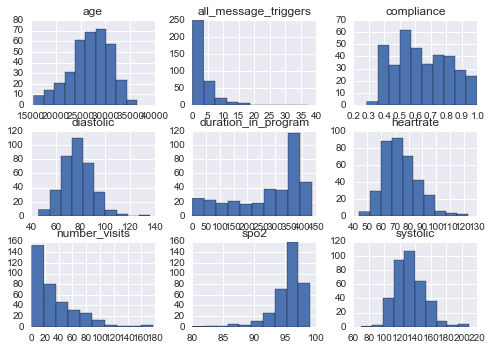

In [42]:
good_data[continuous_feats].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000168F77B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000178A1320>]], dtype=object)

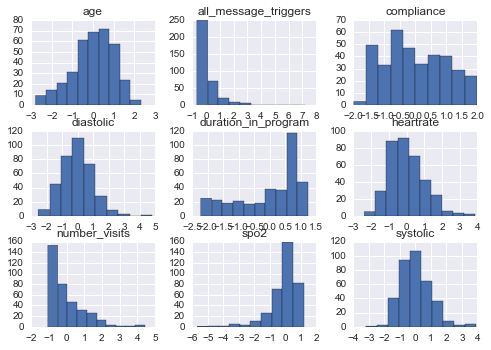

In [43]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
nrmlzr = Normalizer()
stdsclr = StandardScaler()
#good_data[continuous_feats] = nrmlzr.fit_transform(good_data[continuous_feats])
good_data[continuous_feats] = stdsclr.fit_transform(good_data[continuous_feats])
good_data[continuous_feats].hist()

In [44]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(good_data.drop(['rpm_hospitalized'],axis=1), good_data['rpm_hospitalized'], stratify=good_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)

score = clf.score(X_test,y_test)
print score

0.810810810811


In [50]:
from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],index=new_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.01,
          verbose=0, warm_start=False)
0.827692307692
<function _passthrough_scorer at 0x000000000F3C5C18>
0.837837837838


,coef,exp coef
medicaid,0.149748,1.161542
hospitalized,0.015071,1.015185
rehospitalized,0.014853,1.014964
chf,0.025789,1.026125
copd,-0.008208,0.991826
diabetes,-0.004250,0.995759
hypertension,0.027749,1.028138
stroke,0.022648,1.022907
falls,0.015695,1.015819
obesity,0.001753,1.001754


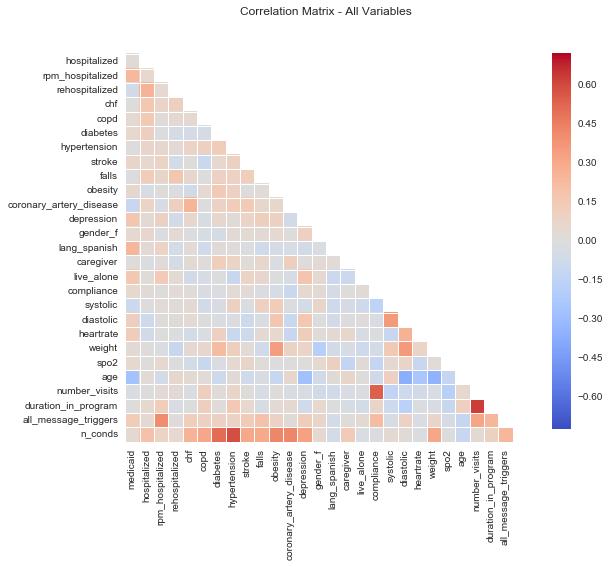

In [46]:
f, ax = plt.subplots(figsize=(9, 9))
sns.corrplot(good_data, annot=False, sig_stars=False,
             diag_names=False, ax=ax)
plt.title('Correlation Matrix - All Variables')
plt.show()

In [47]:
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
# fit the model
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.352784
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       rpm_hospitalized   No. Observations:                  325
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                           27
Date:                Tue, 23 Aug 2016   Pseudo R-squ.:                  0.2826
Time:                        15:24:49   Log-Likelihood:                -114.65
converged:                       True   LL-Null:                       -159.82
                                        LLR p-value:                 9.399e-09
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
const                      -1.8241      1.137     -1.605      0.109        -4.052 

In [48]:
print result.conf_int()

                                0         1
const                   -4.052041  0.403910
medicaid                 0.172683  1.681911
hospitalized            -0.948927  0.697973
rehospitalized          -0.774883  3.241387
chf                     -2.523088  1.880190
copd                    -2.945769  0.651025
diabetes                -2.819985  0.611854
hypertension            -1.891201  1.122466
stroke                  -2.429295  1.556626
falls                   -3.518967  2.465255
obesity                 -3.738964  0.593106
coronary_artery_disease -3.520637  0.631029
depression              -2.024884  2.373198
gender_f                -1.794866  0.001051
lang_spanish            -0.158860  1.734466
caregiver               -1.007103  2.252017
live_alone               0.149697  1.956109
compliance              -0.413128  0.602346
systolic                -0.078064  0.764093
diastolic               -0.599826  0.323539
heartrate               -0.300359  0.450240
weight                  -0.01497

In [49]:
print np.exp(result.params)

const                      0.161368
medicaid                   2.527668
hospitalized               0.882076
rehospitalized             3.432374
chf                        0.725098
copd                       0.317470
diabetes                   0.331521
hypertension               0.680881
stroke                     0.646401
falls                      0.590458
obesity                    0.207437
coronary_artery_disease    0.235792
depression                 1.190243
gender_f                   0.407829
lang_spanish               2.198561
caregiver                  1.863501
live_alone                 2.865959
compliance                 1.099229
systolic                   1.409189
diastolic                  0.870974
heartrate                  1.077820
weight                     0.996135
spo2                       1.142126
age                        0.880290
number_visits              0.474215
duration_in_program        2.074726
all_message_triggers       3.411547
n_conds                    1

for all the factors, we can see that being previously hospitalized increases the odd to be rpm_hospitalized by 12%. Larger factors are live_alone (210%), lang_spanish(117%), depression(108%), chf(117%), and rehospitalized(116%). For continuous variables, a unit increase in that value yields the corresponding increase in 

In [51]:
print result.mle_retvals

{'fopt': 0.35278365454793686, 'score': array([  8.19857003e-18,   0.00000000e+00,   5.97812398e-18,
         8.54017711e-19,   1.40912922e-18,   6.14892752e-18,
         2.73285668e-18,   4.09928501e-18,   3.41607085e-18,
         1.02482125e-18,   0.00000000e+00,   2.73285668e-18,
         1.02482125e-18,   2.73285668e-18,  -6.83214169e-19,
        -6.83214169e-19,   1.22978550e-17,  -1.26394621e-17,
        -7.17374877e-18,  -2.73285668e-18,  -1.29810692e-17,
         6.99611309e-16,   2.73285668e-18,  -6.83214169e-19,
        -8.19857003e-18,  -2.73285668e-18,  -4.09928501e-18,
         2.73285668e-17]), 'iterations': 7, 'converged': True, 'warnflag': 0, 'Hessian': array([[ -1.08802308e-01,  -6.17033530e-02,  -2.86872118e-02,
         -3.55444180e-03,  -4.74105071e-03,  -1.38926096e-02,
         -2.45882637e-02,  -6.73295538e-02,  -8.34248027e-03,
         -2.32020270e-03,  -9.10259951e-03,  -8.07700572e-03,
         -8.69954145e-03,  -8.60595608e-02,  -2.18583391e-02,
         -5.6